## Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

## Data Loading 

In [2]:
df = pd.read_csv('WineQT.csv')

In [3]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

## Data Preprocessing and Visualizations

In [4]:
df['quality'].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


<Axes: >

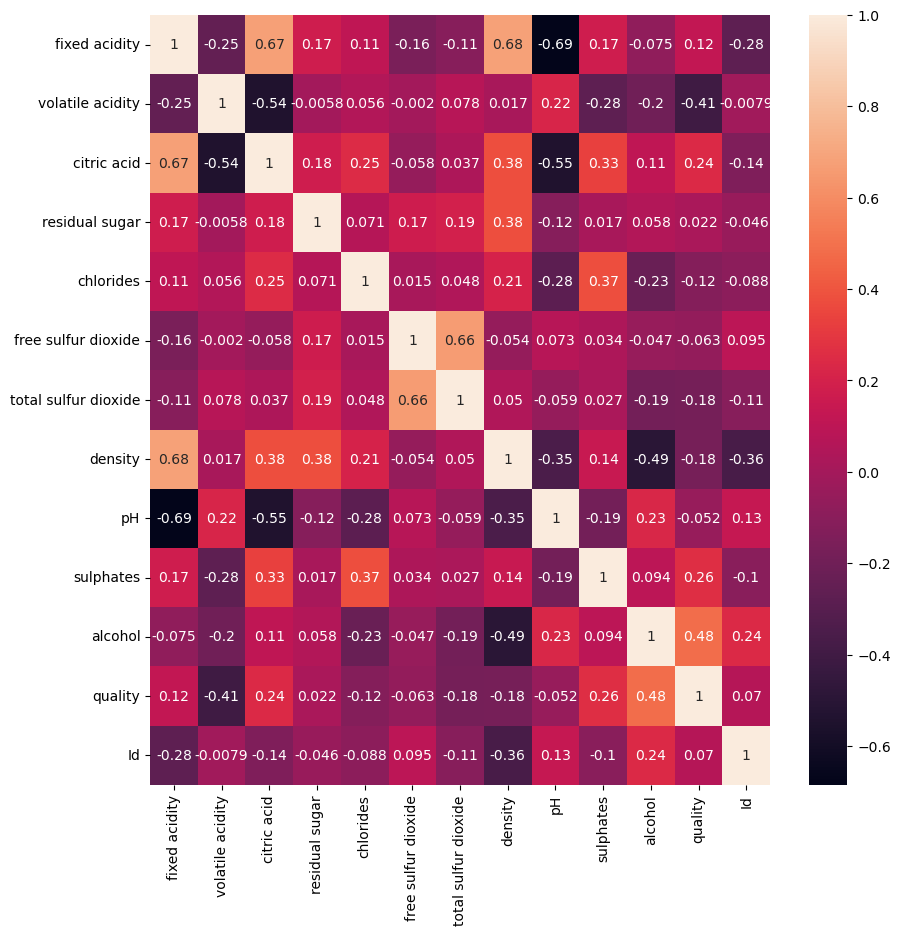

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [7]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

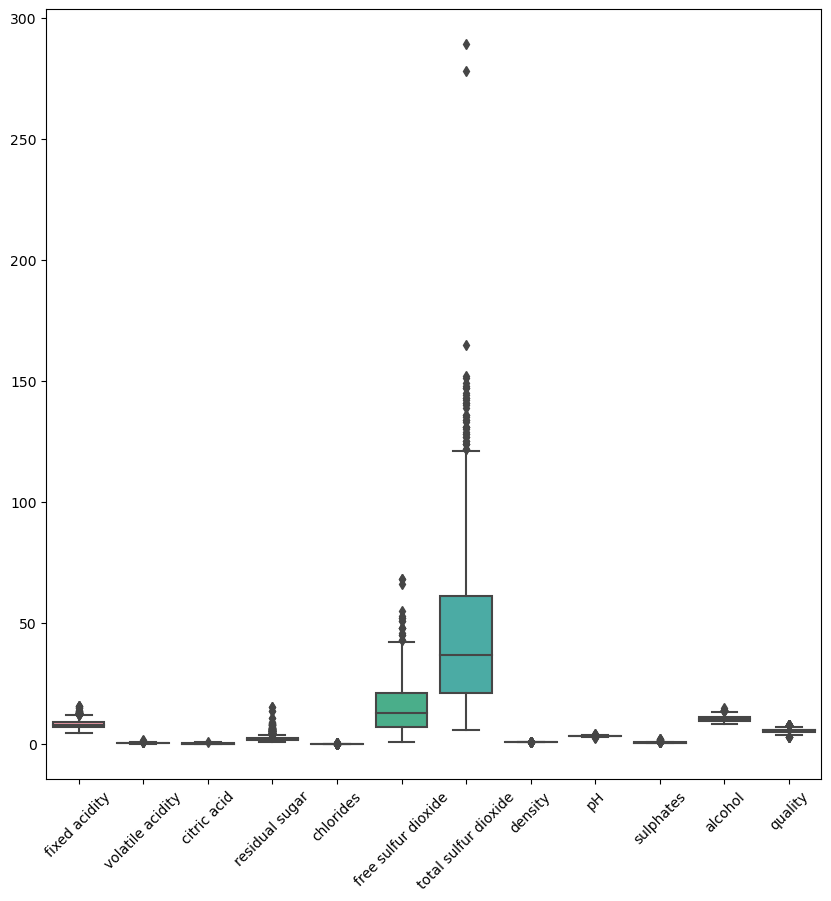

In [8]:
plt.figure(figsize=(10,10))
sns.boxplot(df.drop('Id', axis=1))
plt.xticks(rotation=45)
plt.show()

In [9]:
df['quality'].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

<Axes: ylabel='count'>

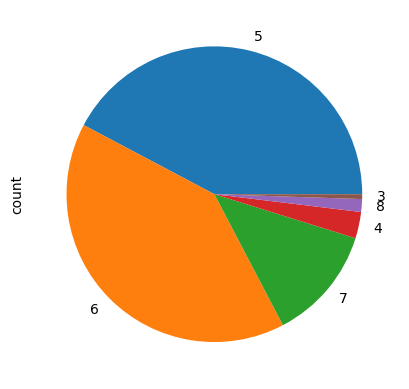

In [10]:
df['quality'].value_counts().plot(kind='pie')

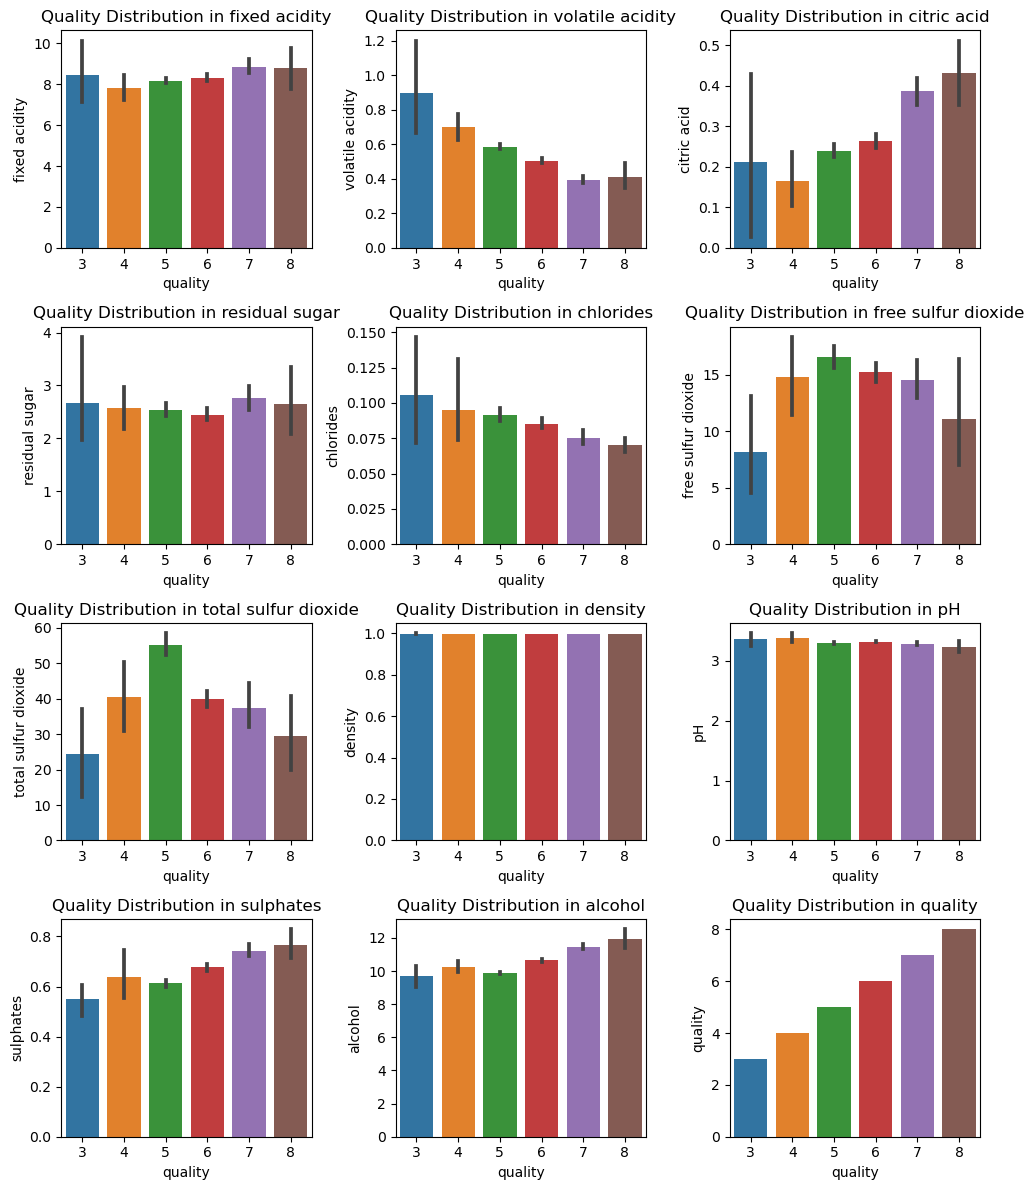

In [11]:
# Create a figure and axes with 4 rows and 3 columns (12 subplots)
fig, axs = plt.subplots(4, 3, figsize=(10, 12))

# Flatten the 2D array of axes to make it easier to iterate over
axs = axs.flatten()
i=0
# Loop through each subplot and plot a histogram
for col in df.columns:
    if i<12:
        sns.barplot(df,x='quality', y=col, ax=axs[i])
        axs[i].set_title(f"Quality Distribution in {col}")
        i+=1

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

- the class distribution is highly imabalanced 
- no oversampling or undersampling technique will solve this problem 
- so makingit a binary classification problem 

In [12]:
def quality_mapped(quality):
    if quality <=5:
        return 'bad'
    else:
        return 'good'

In [13]:
df['quality_group'] = df['quality'].map(quality_mapped)

In [14]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id quality_group  
0      9.4        5   0           bad  
1      9.8        5   1           bad  
2      9.8        5   2           bad  
3      9.8        6   3          good  
4      9.4        5   4           bad

In [15]:
df['quality_group'].value_counts()

quality_group
good    621
bad     522
Name: count, dtype: int64

- no the samples are almost uniformly distributed in both the classes
- no imbalance 

In [16]:
df1 = df.copy()
df1.drop('quality', axis=1, inplace = True)

In [17]:
quality_group_mapped = {'good':1,'bad':0}

In [18]:
df1['quality_group'] = df1['quality_group'].map(quality_group_mapped)
df1.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  Id  quality_group  
0      9.4   0              0  
1      9.8   1              0  
2      9.8   2              0  
3      9.8   3              1  
4      9.4   4              0

In [19]:
df1.shape

(1143, 13)

<Axes: >

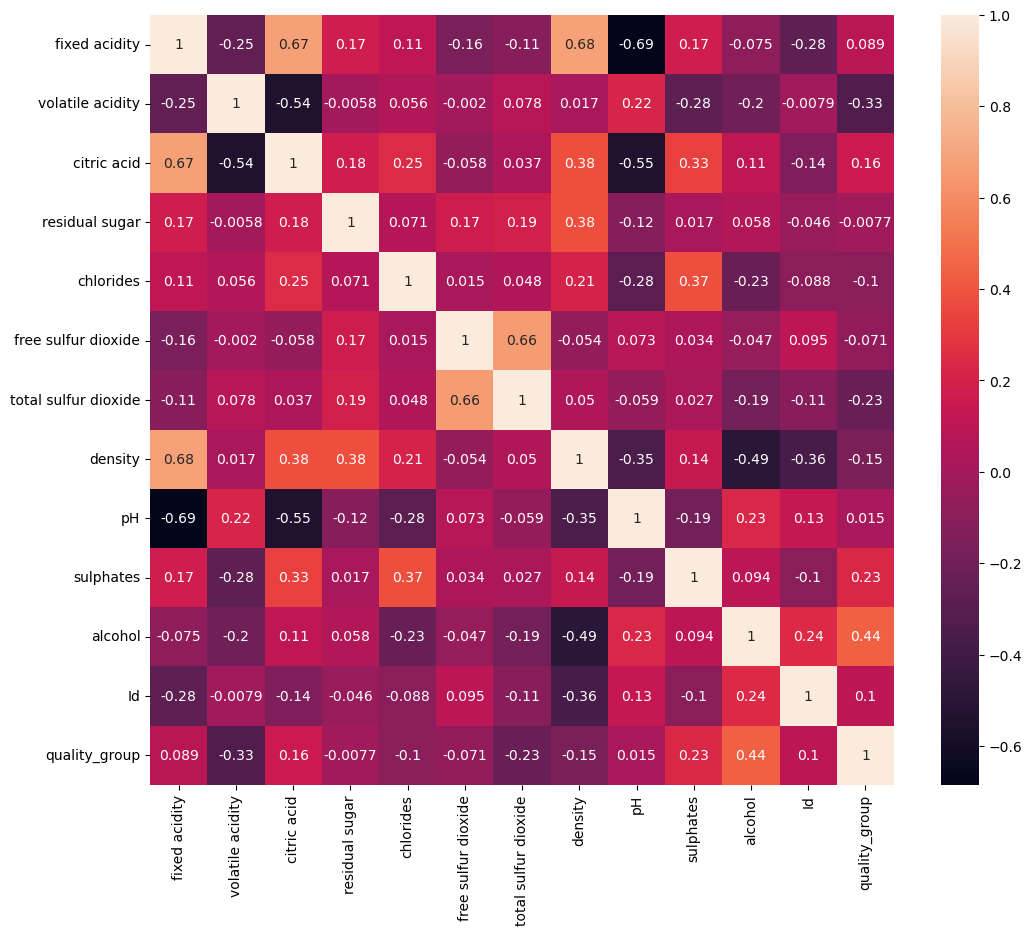

In [20]:
plt.figure(figsize=(12,10))
sns.heatmap(df1.corr(), annot=True)

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pan

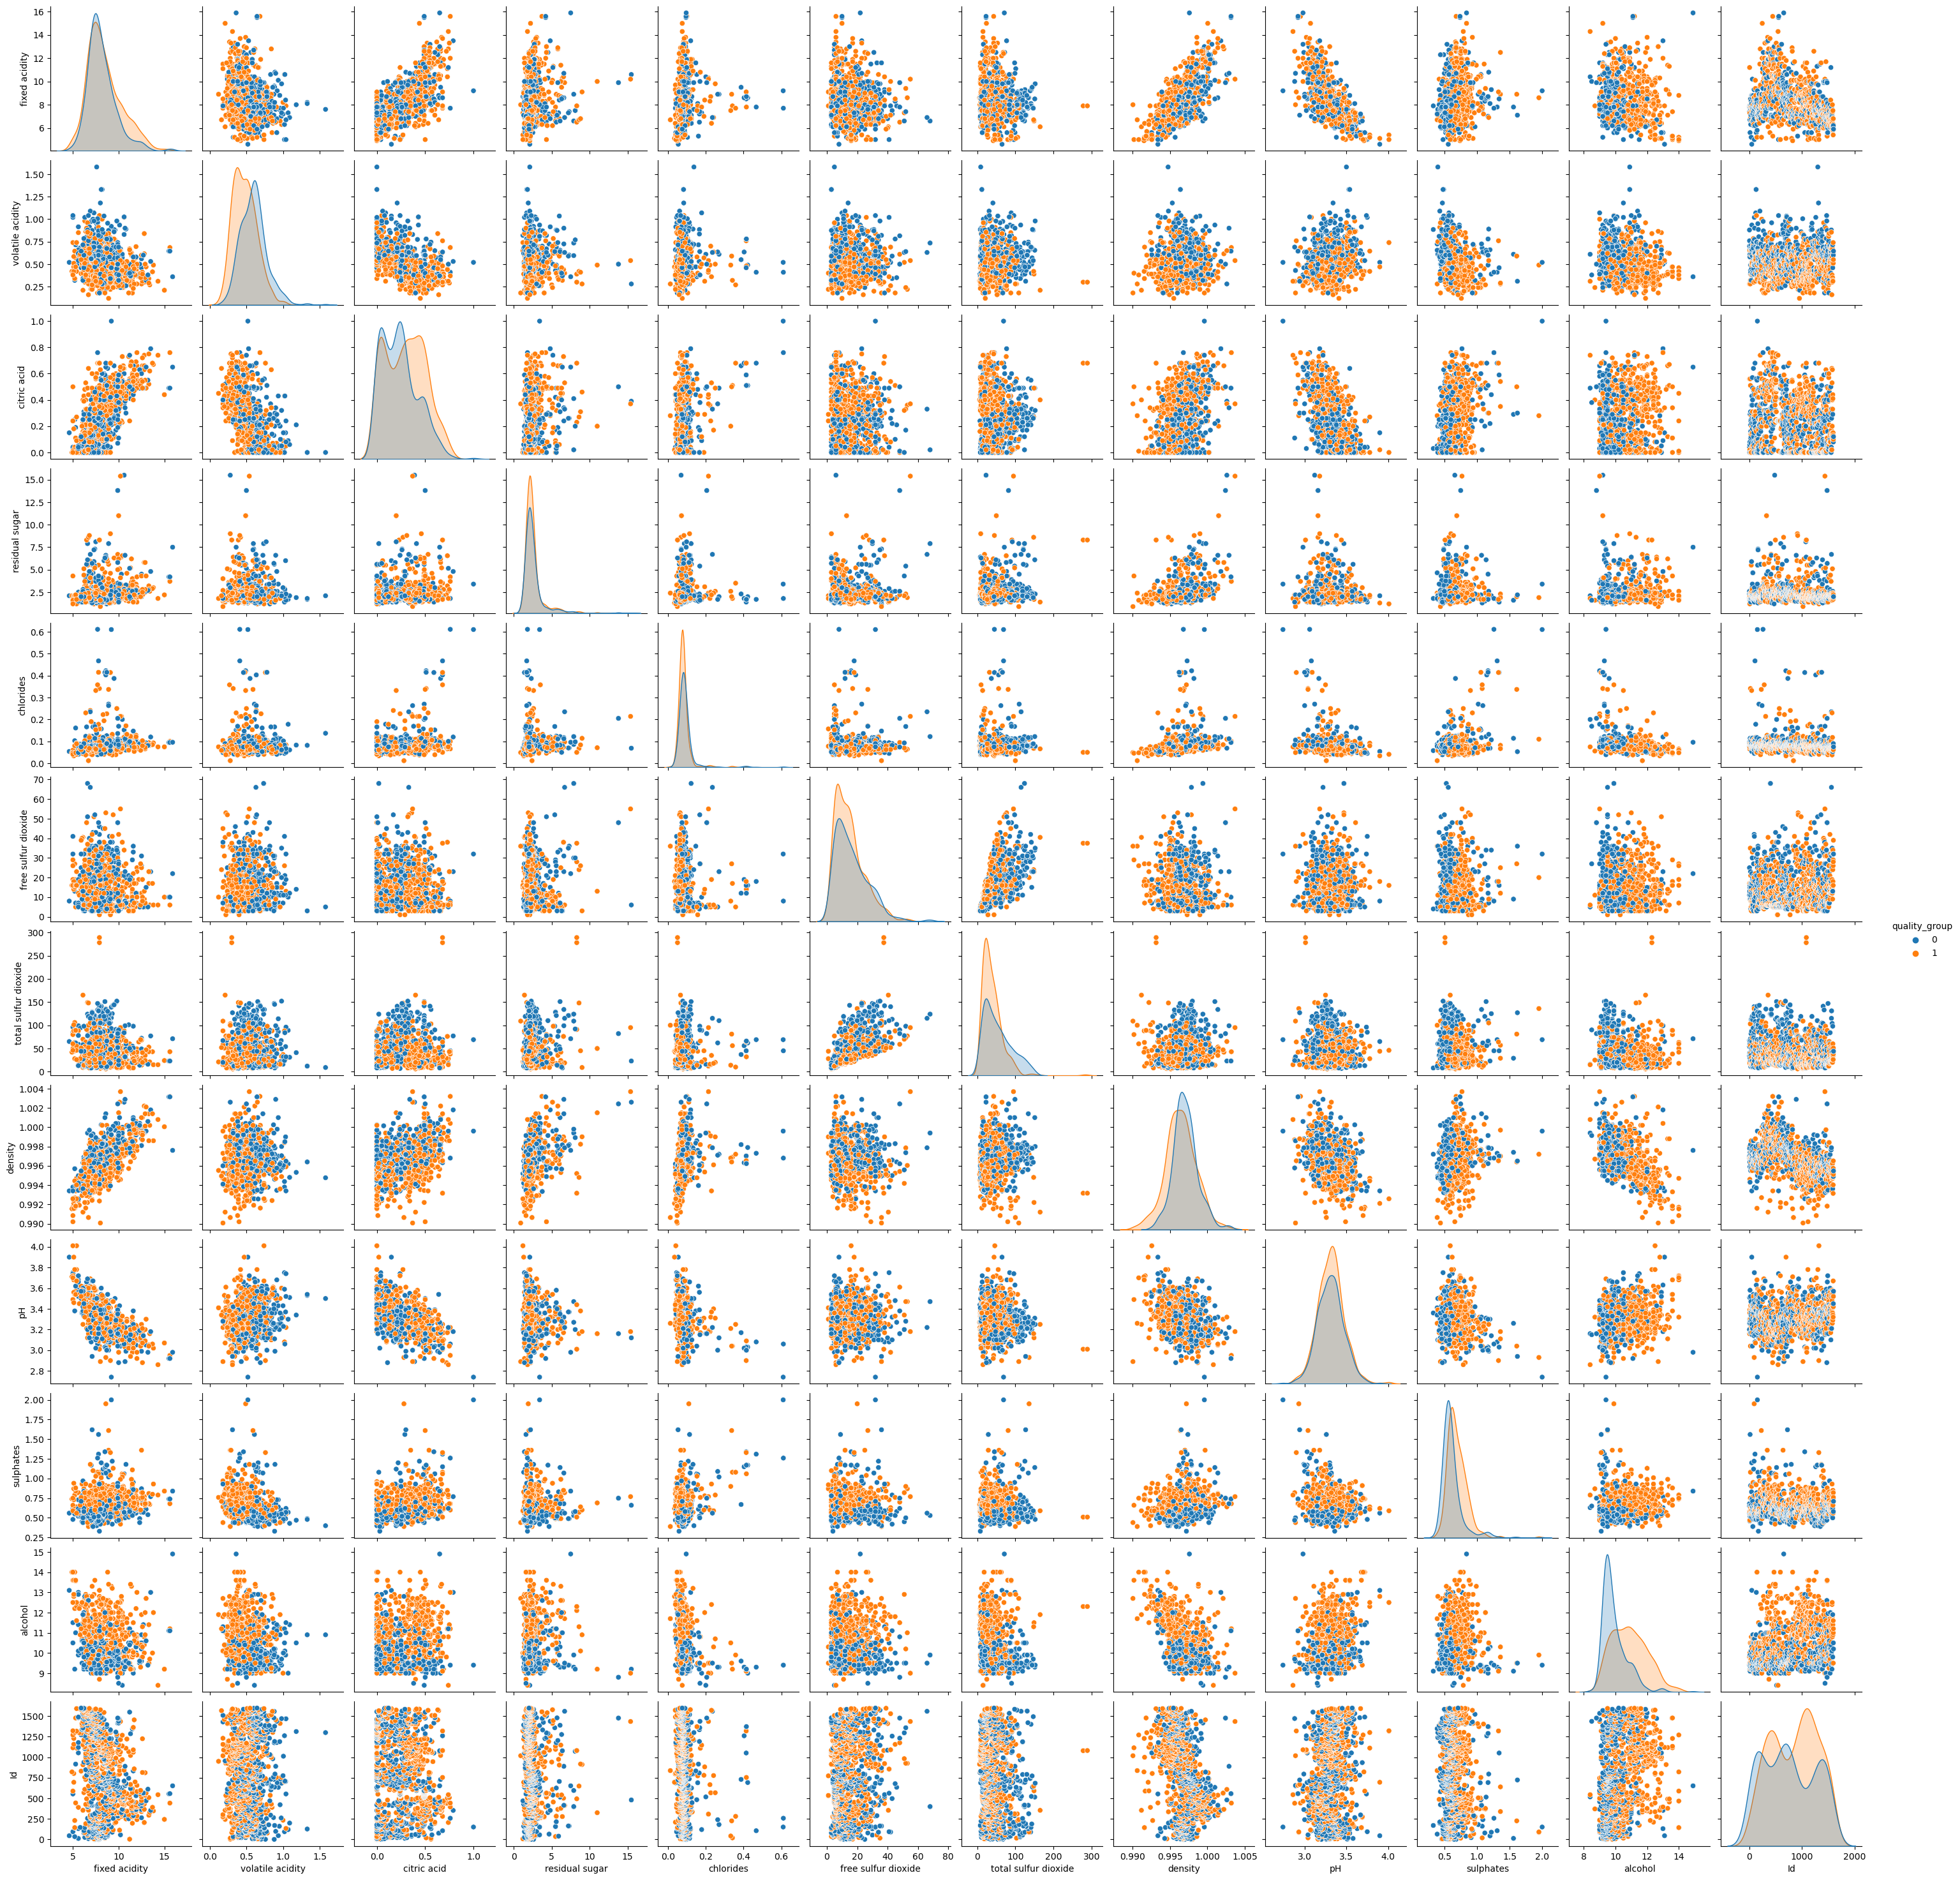

In [21]:
sns.pairplot(df1, hue='quality_group')

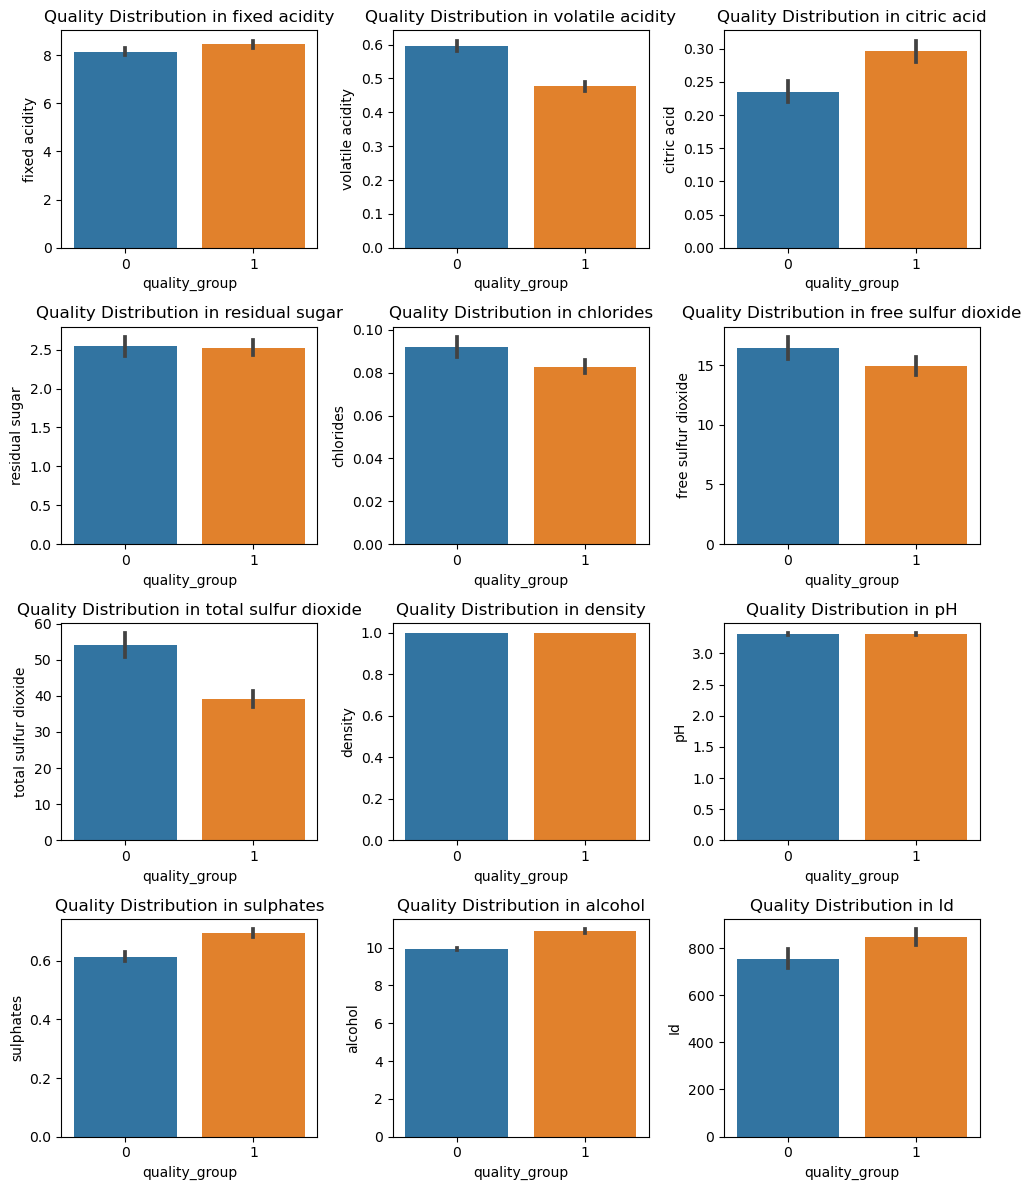

In [22]:
# Create a figure and axes with 4 rows and 3 columns (12 subplots)
fig, axs = plt.subplots(4, 3, figsize=(10, 12))

# Flatten the 2D array of axes to make it easier to iterate over
axs = axs.flatten()
i=0
# Loop through each subplot and plot a histogram
for col in df1.columns:
    if i<12:
        sns.barplot(df1,x='quality_group', y=col, ax=axs[i])
        axs[i].set_title(f"Quality Distribution in {col}")
        i+=1

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

## Data Modeling

In [23]:
X = df1.drop('quality_group', axis=1)
y=df1['quality_group']

In [24]:
scaler = StandardScaler()

In [25]:
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.52157961,  0.93933222, -1.36502663, ..., -0.57365783,
        -0.96338181, -1.73561799],
       [-0.29259344,  1.94181282, -1.36502663, ...,  0.1308811 ,
        -0.59360107, -1.73346186],
       [-0.29259344,  1.27349242, -1.16156762, ..., -0.04525363,
        -0.59360107, -1.73130573],
       ...,
       [-1.20853813,  0.38239855, -0.9581086 , ..., -0.45623467,
         0.05351522,  1.70125196],
       [-1.38027776,  0.10393172, -0.8563791 , ...,  0.60057372,
         0.70063152,  1.70340809],
       [-1.38027776,  0.6330187 , -0.75464959, ...,  0.30701583,
        -0.22382033,  1.70772035]])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

#### Logistic Regression

In [27]:
lgr = LogisticRegression(class_weight='balanced')

In [28]:
lgr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [29]:
y_pred_lgr = lgr.predict(X_test)
y_pred_lgr

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [30]:
accuracy_score(y_test, y_pred_lgr)

0.7947598253275109

In [31]:
print(classification_report(y_test, y_pred_lgr))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       115
           1       0.83      0.75      0.78       114

    accuracy                           0.79       229
   macro avg       0.80      0.79      0.79       229
weighted avg       0.80      0.79      0.79       229



<Axes: >

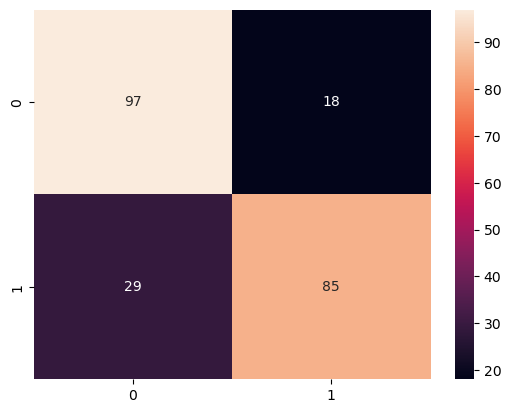

In [32]:
sns.heatmap(confusion_matrix(y_test,y_pred_lgr), annot=True)

#### Decision Tree

In [33]:
dt = DecisionTreeClassifier(criterion='entropy', class_weight='balanced')

In [34]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy')

In [35]:
y_pred_dt = dt.predict(X_test)

In [36]:
accuracy_score(y_test, y_pred_dt)

0.7554585152838428

In [37]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       115
           1       0.72      0.82      0.77       114

    accuracy                           0.76       229
   macro avg       0.76      0.76      0.75       229
weighted avg       0.76      0.76      0.75       229



<Axes: >

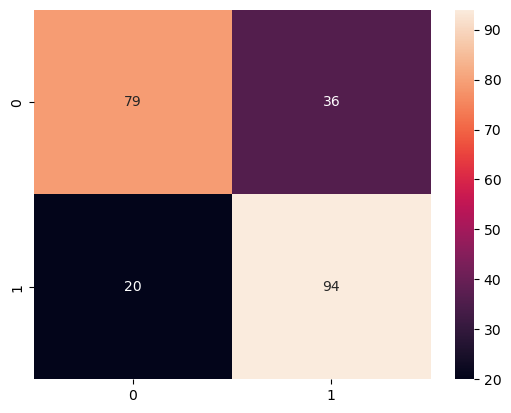

In [38]:
sns.heatmap(confusion_matrix(y_test,y_pred_dt), annot=True)

#### Random Forest

In [39]:
rf = RandomForestClassifier()

In [40]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [42]:
accuracy_score(y_test, y_pred_rf)

0.8165938864628821

In [43]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.87      0.75      0.80       115
           1       0.78      0.89      0.83       114

    accuracy                           0.82       229
   macro avg       0.82      0.82      0.82       229
weighted avg       0.82      0.82      0.82       229



<Axes: >

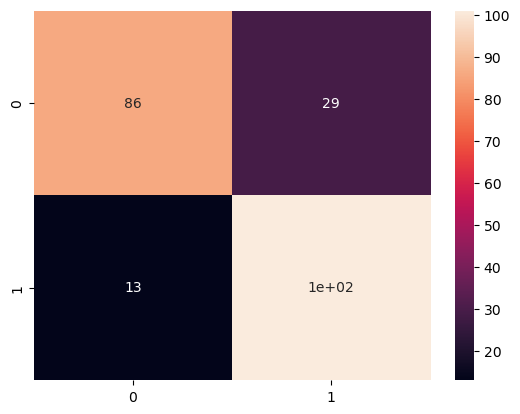

In [44]:
sns.heatmap(confusion_matrix(y_test,y_pred_rf), annot=True)

#### SVM

In [45]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_pred_svm

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [46]:
print("Test Accuracy Score: ", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Test Accuracy Score:  0.7903930131004366
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       115
           1       0.77      0.82      0.80       114

    accuracy                           0.79       229
   macro avg       0.79      0.79      0.79       229
weighted avg       0.79      0.79      0.79       229



<Axes: >

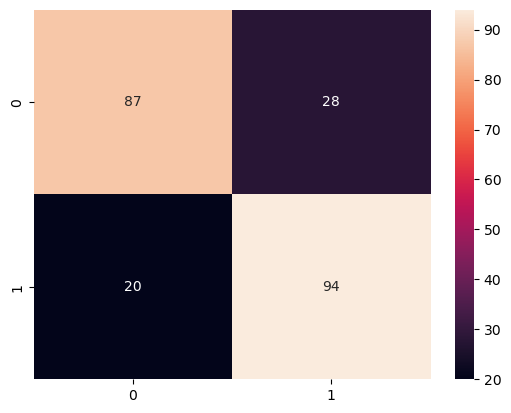

In [47]:
sns.heatmap(confusion_matrix(y_test,y_pred_svm), annot=True)

#### XGBoost

In [48]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1])

In [49]:
print("Test Accuracy Score: ", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

Test Accuracy Score:  0.8165938864628821
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       115
           1       0.79      0.86      0.82       114

    accuracy                           0.82       229
   macro avg       0.82      0.82      0.82       229
weighted avg       0.82      0.82      0.82       229



<Axes: >

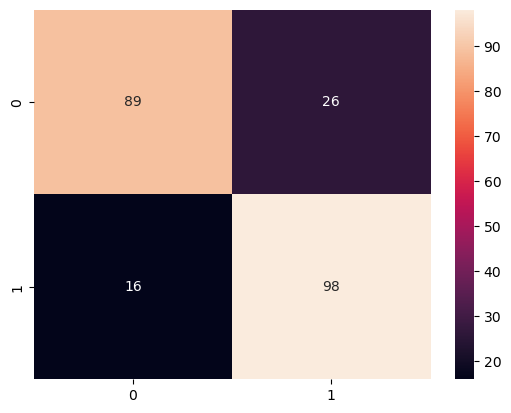

In [50]:
sns.heatmap(confusion_matrix(y_test,y_pred_xgb), annot=True)

## Results

In [51]:
f1_scores = []
y_pred = [y_pred_lgr, y_pred_dt, y_pred_rf, y_pred_svm, y_pred_xgb]
for pred in y_pred:
    f1_scores.append(f1_score(y_test,pred, average=None))

In [52]:
f1_scores

[array([0.80497925, 0.78341014]),
 array([0.73831776, 0.7704918 ]),
 array([0.80373832, 0.82786885]),
 array([0.78378378, 0.79661017]),
 array([0.80909091, 0.82352941])]

In [53]:
accuracy_scores = []
y_pred = [y_pred_lgr, y_pred_dt, y_pred_rf, y_pred_svm, y_pred_xgb]
for pred in y_pred:
    accuracy_scores.append(accuracy_score(y_test,pred))

In [54]:
accuracy_scores

[0.7947598253275109,
 0.7554585152838428,
 0.8165938864628821,
 0.7903930131004366,
 0.8165938864628821]

In [55]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'XGBoost']

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


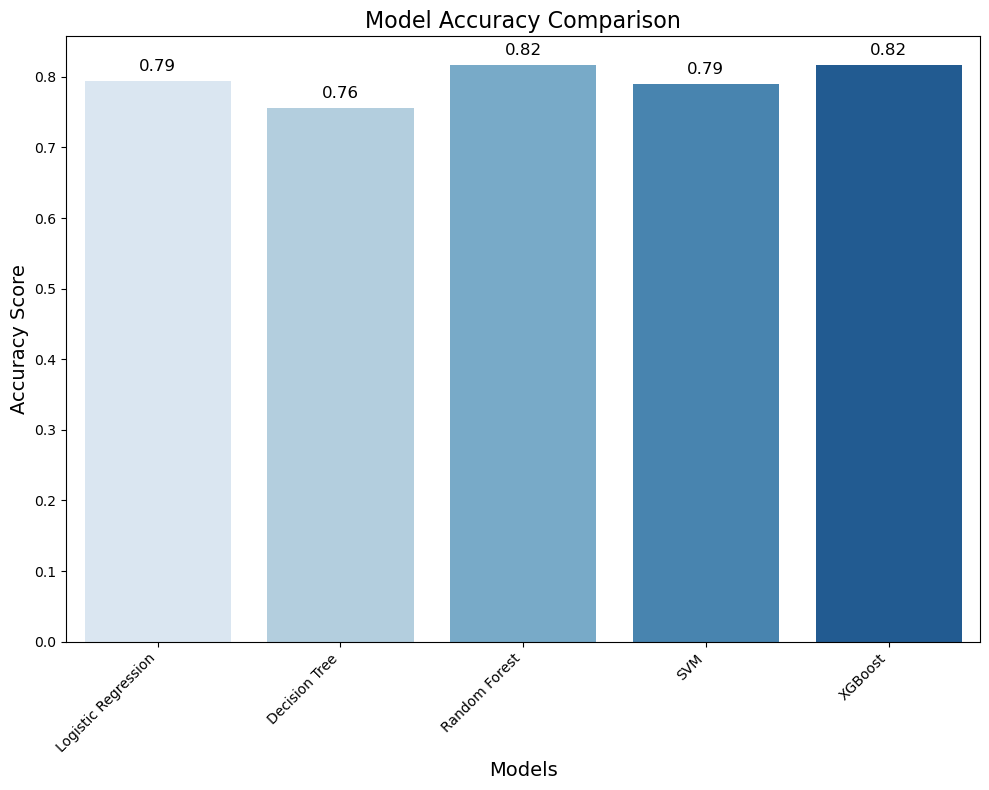

In [56]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=models, y=accuracy_scores, palette='Blues')

# Add value annotations on top of each bar
for i, score in enumerate(accuracy_scores):
    ax.text(i, score + 0.01, f'{score:.2f}', ha='center', va='bottom', fontsize=12)

# Set the title and axis labels
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)

# Rotate x-axis labels if needed (e.g., if model names are long)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [57]:
classes=['good','bad']

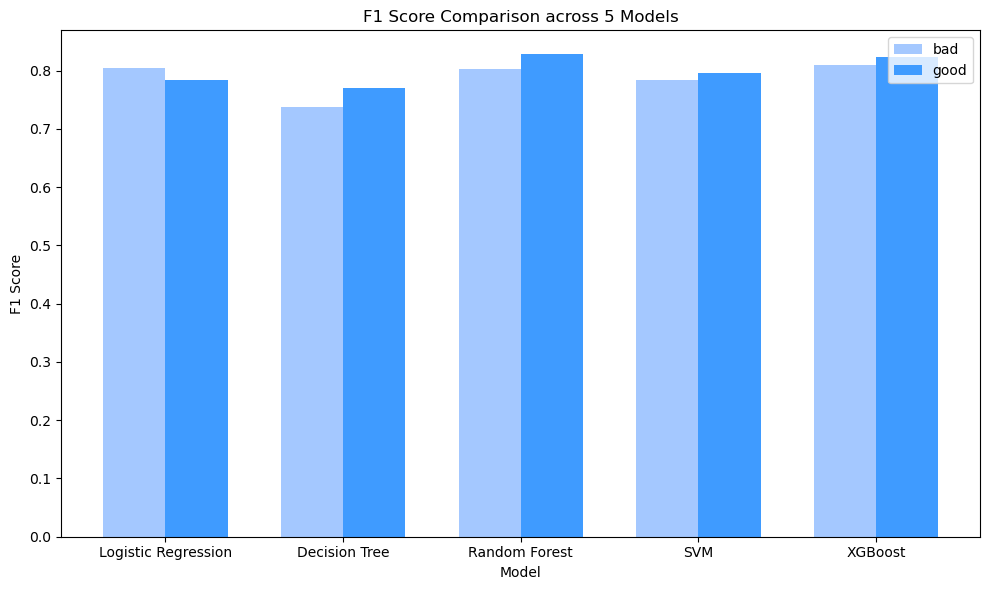

In [58]:
# Number of models
n_models = len(f1_scores)

# Set up bar positions
ind = range(n_models)  # the x locations for the groups
width = 0.35  # the width of the bars

colors = ['#A4C8FF','#3F9BFF']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bars for each class (Class 1 and Class 2)
bars1 = ax.bar([i - width / 2 for i in ind], [f1_scores[i][0] for i in ind], width, label='bad', color=colors[0])
bars2 = ax.bar([i + width / 2 for i in ind], [f1_scores[i][1] for i in ind], width, label='good', color=colors[1])

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Model')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score Comparison across 5 Models')
ax.set_xticks(ind)
ax.set_xticklabels(models)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()